In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import math

In [2]:
def prepare(x_train):
    x_train['intercept']=1
    scaler=StandardScaler()
    scaler.fit(x_train)
    x_train=scaler.transform(x_train)
    x_train[:,-1]=1
    return x_train

In [14]:
def slope(x,y,j,m):
    c=0
    n=len(x)
    for i in range(n):
        pred=0
        for k in range(len(x[0])):
            pred=pred+m[k]*x[i,k]
        if y[i]==1:
            c=c+(max(0,1-pred))*-1*x[i][j]
        else:
            c=c+(max(0,1+pred))*1*x[i][j]
    c=c/n
    return c

In [9]:
def predict(x,m):
    yp=[]
    n=len(x)
    for i in range(n):
            r=0
            for k in range(len(m)):
                r=r+m[k]*x[i,k]
            yp.append(r)
    return np.array(yp)

In [5]:
x=pd.read_csv('C:/Users/Amit/Downloads/breast_data/data.csv')
def encode(row):
    if row=='M':
        row=1
    else :
        row=0
    return row
x.diagnosis=x.diagnosis.apply(encode)

In [7]:
y=x.iloc[:,1]
x=x.iloc[:,2:-1]
x=prepare(x)

In [18]:
m  = np.zeros(len(x[0]))
learning_rate= float(input("Enter alpha"))
epochs=int(input("Enter epochs"))

for epoch in range(epochs):
    for i in range(m.size):
        m[i]=m[i]-learning_rate*slope(x,y,i,m)

Enter alpha0.01
Enter epochs25


In [19]:
predictions=predict(x,m)
for i in range(len(predictions)):
    if predictions[i]>0:
        predictions[i]=1
    else:
        predictions[i]=0
        

In [21]:
(predictions == np.array(y)).sum()/y.count()
#Getting accuracy over 95% on training data , meanwhile our code is correct

0.9578207381370826

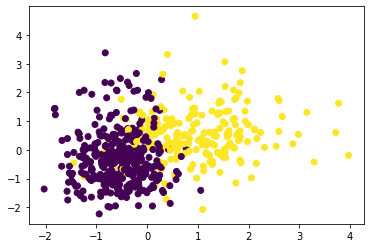

In [22]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=predictions)
plt.show()